# Data Exploration
***

## 1. Import Text Data

In [1]:
total = ""
data = ""

In [2]:
import os
directory = "texts/individual/"
files = []
for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        with open(directory+filename, "r") as myfile:
            data = myfile.read().replace('\n', ' ')
        files.append(filename)
    total = total + data

In [3]:
# Replace commas
total = total.replace("\xe2\x80\x99", "\'")
# Replace ...
total = total.replace("\xe2\x80\xa6", "...")
# Replace quotations
total = total.replace('\xe2\x80\x9c','"')
total = total.replace('\xe2\x80\x9d','"')
# Replace backslashes
total = total.replace("\\", "")
# Convert to lowercase
total = total.lower()

In [4]:
files

['the-cat-in-a-hat.txt',
 'horton-hears-a-who.txt',
 'ten-apples-up-on-top.txt',
 'wacky-wednesday.txt',
 'happy-birthday-to-you.txt',
 'if-i-ran-the-zoo.txt',
 'the-butter-battle-book.txt',
 'the-foot-book.txt',
 'oh-the-places-youll-go.txt',
 'the-sneetches.txt',
 'the-lorax.txt',
 'marvin-k-mooney-will-you-please-go-now.txt',
 'i-can-read-with-my-eyes-shut.txt',
 'wocket-in-my-pocket.txt',
 'hop-on-pop.txt',
 'how-the-grinch-stole-christmas.txt',
 'one-fish-two-fish-red-fish-blue-fish.txt',
 'mr-brown-can-moo-can-you.txt',
 'fox-in-socks.txt',
 'green-eggs-and-ham.txt',
 'in-a-people-house.txt']

In [5]:
len(total)

85028

## 2. Create Char Dictionary

In [6]:
def char_dict(texts):
    wl = {}
    for char in texts:
        if char not in wl:
            wl[char] = 1
        else:
            wl[char] += 1
    return wl

In [7]:
import operator
d = char_dict(total)
sorted_cd = sorted(d.items(), key=lambda x: x[1], reverse=True)

In [8]:
# create a string composed of irrelevant characters (used less than 50 times)
unwanted_chars = ""
for c in sorted_cd:
    if c[1] < 50:
        unwanted_chars = unwanted_chars+str(c[0])
# remove irrelevant characters from text data 
total=total.translate(None,unwanted_chars)

In [18]:
cd = char_dict(total)
sorted_cd = sorted(cd.items(), key=lambda x: x[1], reverse=True)

In [19]:
print('Char Dictionary Size: %d' % len(sorted_cd))

Char Dictionary Size: 34


In [20]:
print('Dictionary:\n %s' % sorted_cd)

Dictionary:
 [(' ', 17149), ('e', 7122), ('o', 5735), ('t', 5557), ('a', 4842), ('h', 4180), ('n', 3987), ('i', 3912), ('s', 3653), ('r', 3052), ('l', 2999), ('d', 2499), ('u', 2117), ('w', 1818), ('.', 1808), ('y', 1602), ('m', 1568), ('c', 1434), ('g', 1398), ('p', 1196), ('f', 1124), ('k', 1111), ('b', 1095), (',', 961), ('!', 712), ('"', 521), ("'", 486), ('v', 445), ('-', 244), ('x', 167), ('?', 136), ('z', 129), ('j', 108), ('q', 57)]


In [21]:
import matplotlib.pyplot as plt
import numpy as np

In [22]:
cx = []
cy = []
for c in sorted_cd:
    cx.append(c[0])
    cy.append(c[1])

In [23]:
cx = np.array(cx)
cy = np.array(cy)
ind = np.arange(len(cy))

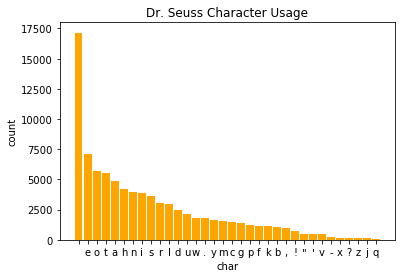

In [27]:
plt.bar(ind, cy, tick_label=cx, color='orange')
plt.title('Dr. Seuss Character Usage')
plt.xlabel('char')
plt.ylabel('count')
plt.show()

## 3. Create Word Dictionary

In [54]:
def word_dict(texts):
    wl = {}
    tl = texts.split()
    for word in tl:
        if word not in wl:
            wl[word] = 1
        else:
            wl[word] += 1
    return wl

In [55]:
import string
total_no_punc = total.translate(None, string.punctuation)
wd = word_dict(total_no_punc)
sorted_wd = sorted(wd.items(), key=lambda x: x[1], reverse=True)

In [56]:
print('Word Dictionary Size: %d' % len(sorted_wd))

Word Dictionary Size: 2345


In [57]:
wx = []
wy = []
for w in sorted_wd:
    wx.append(w[0])
    wy.append(w[1])

In [58]:
wx = np.array(wx)
wy = np.array(wy)
ind = np.arange(len(wy))

In [59]:
wy

array([679, 568, 468, ...,   1,   1,   1])

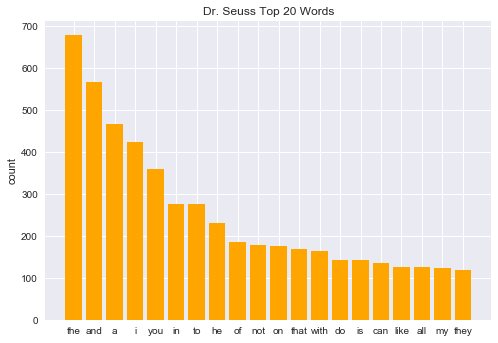

In [71]:
plt.bar(ind[:20], wy[:20], tick_label=wx[:20], color='orange')
plt.title('Dr. Seuss Top 20 Words')
plt.ylabel('count')
plt.show()

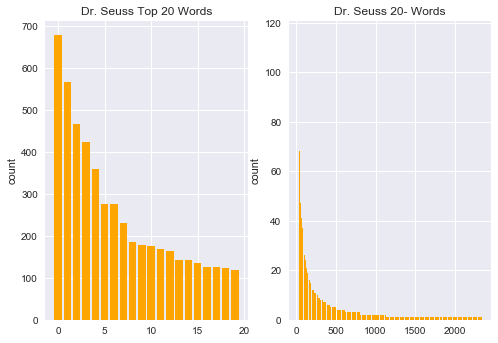

In [70]:
plt.subplot(1,2,1)
plt.bar(ind[:20], wy[:20], color='orange')
plt.title('1 - 20')
plt.ylabel('count')
plt.subplot(1,2,2)
plt.bar(ind[20:], wy[20:], color='orange')
plt.title('Dr. Seuss 20- Words')
plt.ylabel('count')
plt.show()

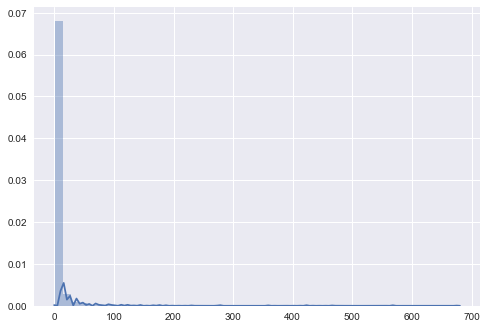

In [62]:
import seaborn as sns
sns.set()
sns.distplot(wy)
plt.show()